In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import numpy as np
from scipy import stats
from scipy.stats import mannwhitneyu
from scipy.stats import shapiro

%matplotlib inline

pd.options.display.max_columns = 37  # nr max de colunas exibidas

In [2]:
# open csv file
arquivo_csv = 'dados_all.csv'

original = pd.read_csv(arquivo_csv, ';')

df = original.copy()

In [3]:
#linhas e colunas
df.shape

(334, 16)

In [4]:
#TRATAMENTO DOS DADOS
#drop all the columns where all the data is empty
df = df.dropna(how='all', axis='columns')

#Remove unnamed columns
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

In [5]:
df.shape

(334, 16)

In [6]:
df.head()

,Data,Palmeira,Altura Palmeira (m),Área,Quadrante,Número,Família,Gênero,Espécie,Altura (cm),Dap (mm),Coletada,Nativa,Estágio sucessional,Obs,Identificação
0,29/11/2019,1,3,Copa,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Nenhuma planta,NaN
1,29/11/2019,1,3,Copa,2,2,Rubiaceae,Coffea,Coffea arabica,34.0,3,N,N,Umbrófila,NaN,OK
2,29/11/2019,1,3,Copa,2,3,Rubiaceae,Coffea,Coffea arabica,29.0,"4,5",N,N,Umbrófila,NaN,OK
3,29/11/2019,1,3,Copa,2,4,Sapindaceae,Cupania,Cupania oblongifolia,58.0,"5,4",N,S,Secundária Inicial,NaN,OK
4,29/11/2019,1,3,Copa,2,5,Sapindaceae,Cupania,Cupania oblongifolia,164.0,"10,8",N,S,Secundária Inicial,NaN,OK


In [7]:
#tipos de dados das colunas
print(df.dtypes)

Data                    object
Palmeira                 int64
Altura Palmeira (m)      int64
Área                    object
Quadrante                int64
Número                  object
Família                 object
Gênero                  object
Espécie                 object
Altura (cm)            float64
Dap (mm)                object
Coletada                object
Nativa                  object
Estágio sucessional     object
Obs                     object
Identificação           object
dtype: object


In [8]:
#Ajustando os tipos de dados

df['Estágio sucessional'] = df['Estágio sucessional'].astype(str)
df['Nativa'] = df['Nativa'].astype(str)
df['Espécie'] = df['Espécie'].astype(str)
df['Gênero'] = df['Gênero'].astype(str)
df['Família'] = df['Família'].astype(str)
df['Quadrante'] = df['Quadrante'].astype(str)
df['Área'] = df['Área'].astype('category')
df['Altura Palmeira (m)'] = df['Altura Palmeira (m)'].astype(str)
df['Palmeira'] = df['Palmeira'].astype(str)
df['Dap (mm)'] = df['Dap (mm)'].astype(str)

#troca , por . no na coluna dap
df['Dap (mm)'] = df['Dap (mm)'].apply(lambda x: x.replace(',', '.'))
df['Dap (mm)'] = df['Dap (mm)'].astype('float64')

In [9]:
#tipos de dados ajustados
print(df.dtypes)

Data                     object
Palmeira                 object
Altura Palmeira (m)      object
Área                   category
Quadrante                object
Número                   object
Família                  object
Gênero                   object
Espécie                  object
Altura (cm)             float64
Dap (mm)                float64
Coletada                 object
Nativa                   object
Estágio sucessional      object
Obs                      object
Identificação            object
dtype: object


In [10]:
df.head()

,Data,Palmeira,Altura Palmeira (m),Área,Quadrante,Número,Família,Gênero,Espécie,Altura (cm),Dap (mm),Coletada,Nativa,Estágio sucessional,Obs,Identificação
0,29/11/2019,1,3,Copa,1,NaN,nan,nan,nan,NaN,NaN,NaN,nan,nan,Nenhuma planta,NaN
1,29/11/2019,1,3,Copa,2,2,Rubiaceae,Coffea,Coffea arabica,34.0,3.0,N,N,Umbrófila,NaN,OK
2,29/11/2019,1,3,Copa,2,3,Rubiaceae,Coffea,Coffea arabica,29.0,4.5,N,N,Umbrófila,NaN,OK
3,29/11/2019,1,3,Copa,2,4,Sapindaceae,Cupania,Cupania oblongifolia,58.0,5.4,N,S,Secundária Inicial,NaN,OK
4,29/11/2019,1,3,Copa,2,5,Sapindaceae,Cupania,Cupania oblongifolia,164.0,10.8,N,S,Secundária Inicial,NaN,OK


In [11]:
#new shape
df.shape

(334, 16)

In [12]:
#Ajuste valores ausentes nas colunas Estágio Sucessional e Nativa 
df['Estágio sucessional'] =  df['Estágio sucessional'].apply(lambda x: x.replace('nan', 'indeterminado'))
df['Estágio sucessional'] =  df['Estágio sucessional'].fillna('indeterminado')
df['Nativa'] =  df['Nativa'].apply(lambda x: x.replace('nan', 'indeterminado'))
df['Nativa'] =  df['Nativa'].fillna('indeterminado')

In [13]:
#Ajustar Area externa para 'Entorno'
df['Área'] =  df['Área'].apply(lambda x: x.replace('Externo', 'Entorno'))

In [14]:
#Remove decimal do nome da palmeira e da altura da palmeira 
df['Palmeira'] = df['Palmeira'].apply(lambda x: x.split('.')[0]) 
df['Altura Palmeira (m)'] = df['Altura Palmeira (m)'].apply(lambda x: x.split('.')[0]) 

In [15]:
#contar registros em cada grupo em estudo
df['Área'].value_counts()

Entorno    233
Copa       101
Name: Área, dtype: int64

In [16]:
#Dataframe com quadrantes sem plantas (df_with_nan)
df_with_nan= df.copy()
#df_with_nan['Número'] =  df_with_nan['Número'].fillna(0)
df_with_nan['Área'].value_counts()

Entorno    233
Copa       101
Name: Área, dtype: int64

In [17]:
#quantidade de individuos nas parcelas da copa
copa_with_nan = df_with_nan[df_with_nan['Área'] == 'Copa']

abundancia_copa3m = copa_with_nan[copa_with_nan['Altura Palmeira (m)'] == '3']
abundancia_copa6m = copa_with_nan[copa_with_nan['Altura Palmeira (m)'] == '6']

abundancia_copa3m.describe()


,Altura (cm),Dap (mm)
count,55.000000,55.000000
mean,69.400000,8.002364
std,61.674954,7.650251
min,20.000000,1.750000
25%,23.500000,3.000000
50%,42.000000,5.700000
75%,92.500000,9.500000
max,300.000000,41.300000


In [18]:
abundancia_copa6m.describe()

,Altura (cm),Dap (mm)
count,40.000000,40.000000
mean,99.450000,10.765750
std,152.195884,14.607978
min,20.000000,2.100000
25%,22.000000,3.850000
50%,43.000000,4.890000
75%,73.500000,9.812500
max,700.000000,80.000000


In [19]:
print("TESTES ESTATISTICOS DE NORMALIDADE PARA AS DISTRIBUIÇOES DE ALTURAS E DIAMETROS DAS PLANTAS SOB AS COPAS DAS PALMEIRAS DE 3M E 6M")

#teste Shapiro: checagem de normalidade
#teste T: comparação de médias (https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html)
#T test for diferent sample sizes: https://www.youtube.com/watch?v=OyB_w4XNQ58
#teste Mann-Whithney: comparação das distribuicoes

print ("------------------------------------- ALTURA --------------------------------------------")
# 1 - Shapiro-Wilk Test (teste de normalidade) para os dados de ALTURA da copa 3M
stat, p = shapiro(abundancia_copa3m['Altura (cm)'])
print('Statistics=%.3f, p=%.3f' % (stat, p))

alpha = 0.05
if p > alpha:
	print('Grupo COPA 3M tem distribuição normal para altura (aceita H0)')
else:
	print('Grupo COPA 3M não tem distribuição normal  para altura (rejeita H0)')

print('-------------------------------------------------------------------------')

# 2 - Shapiro-Wilk Test (teste de normalidade) para os dados de ALTURA da copa 6M
stat, p = shapiro(abundancia_copa6m['Altura (cm)'])
print('Statistics=%.3f, p=%.3f' % (stat, p))

if p > alpha:
	print('Grupo COPA 6M tem distribuição normal para altura (aceita H0)')
else:
	print('Grupo COPA 6M não tem distribuição normal  para altura (rejeita H0)')

print('-------------------------------------------------------------------------')

# 3 - Welch’s T-TEST para os dados de altura
stat, p = stats.ttest_ind(abundancia_copa3m['Altura (cm)'],abundancia_copa6m['Altura (cm)'], equal_var= False )

if p > alpha:
	print(' Welch’sT-TEST: A média das alturas não varia significativamente nos dados de altura da copa (aceita H0)')
else:
	print('Welch’s t-test T-TEST: A média das alturas varia significativamente nos dados de altura da copa (rejeita H0)')

print('-------------------------------------------------------------------------')

# 4 - Mann-Withney Test PARA DADOS DE DIAMETRO NA COPA
stat, p = mannwhitneyu(abundancia_copa3m['Altura (cm)'],abundancia_copa6m['Altura (cm)'])

if p > alpha:
	print('MANN-WHITNEY:: A média das alturas não varia significativamente nos dados de altura no entorno (aceita H0)')
else:
	print('MANN-WHITNEY: A média das alturas varia significativamente nos dados de altura no entorno (rejeita H0)')

print('-------------------------------------------------------------------------')

#------------------------------------------- DIAMETRO ------------------------------------------------------------

print ("---------------------------------- DIAMETRO ---------------------------------------")
# 1 - Shapiro-Wilk Test (teste de normalidade) para os dados de DIAMETRO da copa 3M
stat, p = shapiro(abundancia_copa3m['Dap (mm)'])
print('Statistics=%.3f, p=%.3f' % (stat, p))

if p > alpha:
	print('Grupo COPA 3M tem distribuição normal para diametro (aceita H0)')
else:
	print('Grupo COPA 3M não tem distribuição normal para diamentro (rejeita H0)')

print('-------------------------------------------------------------------------')

# 2 - Shapiro-Wilk Test (teste de normalidade) para os dados de DIAMETRO da copa 6M
stat, p = shapiro(abundancia_copa6m['Dap (mm)'])
print('Statistics=%.3f, p=%.3f' % (stat, p))

alpha = 0.05
if p > alpha:
	print('Grupo COPA 6M tem distribuição normal para diametro (aceita H0)')
else:
	print('Grupo COPA 6M não tem distribuição normal para diametro (rejeita H0)') 

print('-------------------------------------------------------------------------')


# 3 - Welch’s T-TEST para dados de diametro
stat, p = stats.ttest_ind(abundancia_copa3m['Dap (mm)'],abundancia_copa6m['Dap (mm)'],  equal_var= False )

if p > alpha:
	print('Welch’s T-TEST: A média dos diametros não varia significativamente nos dados de diametro da copa (aceita H0)')
else:
	print('Welch’s T-TEST: A média dos diametros varia significativamente nos dados de diametro da copa (rejeita H0)')
    
print('-------------------------------------------------------------------------')

# 4 - Mann-Withney Test PARA DADOS DE DIAMETRO NA COPA
stat, p = mannwhitneyu(abundancia_copa3m['Dap (mm)'],abundancia_copa6m['Dap (mm)'])

if p > alpha:
	print('MANN-WHITNEY:: A média dos diametros não varia significativamente nos dados de altura no entorno (aceita H0)')
else:
	print('MANN-WHITNEY: A média dos diametros varia significativamente nos dados de altura no entorno (rejeita H0)')


TESTES ESTATISTICOS DE NORMALIDADE PARA AS DISTRIBUIÇOES DE ALTURAS E DIAMETROS DAS PLANTAS SOB AS COPAS DAS PALMEIRAS DE 3M E 6M
------------------------------------- ALTURA --------------------------------------------
Statistics=nan, p=1.000
Grupo COPA 3M tem distribuição normal para altura (aceita H0)
-------------------------------------------------------------------------
Statistics=nan, p=1.000
Grupo COPA 6M tem distribuição normal para altura (aceita H0)
-------------------------------------------------------------------------
Welch’s t-test T-TEST: A média das alturas varia significativamente nos dados de altura da copa (rejeita H0)
-------------------------------------------------------------------------
MANN-WHITNEY:: A média das alturas não varia significativamente nos dados de altura no entorno (aceita H0)
-------------------------------------------------------------------------
---------------------------------- DIAMETRO ---------------------------------------
Statistics=n

In [20]:
#analise de dados da copa considerando todas as palmeiras
abundancia_copa = copa_with_nan
abundancia_copa = abundancia_copa.groupby(['Palmeira','Quadrante'])['Número'].count() 
abundancia_copa

Palmeira  Quadrante
1         1            0
          2            8
          3            0
          4            1
10        1            0
          2            1
          3            4
          4            1
2         1            2
          2            1
          3            3
          4            3
3         1            2
          2            0
          3            5
          4            3
4         1            2
          2            3
          3            5
          4            4
5         1            5
          2            2
          3            2
          4            4
6         1            1
          2            0
          3            0
          4            2
7         1            2
          2            2
          3            2
          4            4
8         1            3
          2            5
          3            2
          4            3
9         1            2
          2            2
          3            2
     

In [21]:
#Percentual de individuos sob as copas
total_parcelas_copa = abundancia_copa.count()
copa_0_2 = (abundancia_copa[abundancia_copa < 3 ].count() / total_parcelas_copa) * 100
copa_3_5 = (abundancia_copa[abundancia_copa[(abundancia_copa >= 3) & (abundancia_copa <6)]].count()/ total_parcelas_copa) * 100
copa_6_8 = (abundancia_copa[abundancia_copa[(abundancia_copa > 6) ]].count() / total_parcelas_copa) * 100
dados_copa = [copa_0_2,copa_3_5,copa_6_8]

Text(0.5,0,'Quantidade de regenerantes nas parcelas sob as copas')

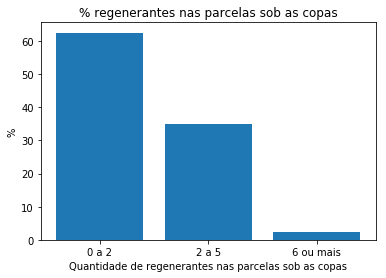

In [22]:
legendas = ['0 a 2', '2 a 5', '6 ou mais']
dados = dados_copa

ax = plt.figure().gca()
ax.bar(legendas,dados)
plt.title ("% regenerantes nas parcelas sob as copas")
plt.ylabel("%")
plt.xlabel("Quantidade de regenerantes nas parcelas sob as copas")


In [23]:
abundancia_copa3m = abundancia_copa3m.groupby(['Palmeira','Quadrante'])['Número'].count()
abundancia_copa6m = abundancia_copa6m.groupby(['Palmeira','Quadrante'])['Número'].count() 
abundancia_copa3m

Palmeira  Quadrante
1         1            0
          2            8
          3            0
          4            1
2         1            2
          2            1
          3            3
          4            3
3         1            2
          2            0
          3            5
          4            3
4         1            2
          2            3
          3            5
          4            4
5         1            5
          2            2
          3            2
          4            4
Name: Número, dtype: int64

In [24]:
abundancia_copa6m

Palmeira  Quadrante
10        1            0
          2            1
          3            4
          4            1
6         1            1
          2            0
          3            0
          4            2
7         1            2
          2            2
          3            2
          4            4
8         1            3
          2            5
          3            2
          4            3
9         1            2
          2            2
          3            2
          4            2
Name: Número, dtype: int64

In [25]:
#Percentual de individuos sob as copas 3m
total_parcelas_copa3m = abundancia_copa3m.count()
copa3m_0_2 = (abundancia_copa3m[abundancia_copa3m < 3 ].count() / total_parcelas_copa3m) * 100
copa3m_3_5 = (abundancia_copa3m[abundancia_copa3m[(abundancia_copa3m >= 3) & (abundancia_copa3m <6)]].count()/ total_parcelas_copa3m) * 100
copa3m_6_8 = (abundancia_copa3m[abundancia_copa3m[(abundancia_copa3m >= 6) ]].count() / total_parcelas_copa3m) * 100
dados_copa3m = [copa3m_0_2, copa3m_3_5, copa3m_6_8]

#Percentual de individuos sob as copas 6m
total_parcelas_copa6m = abundancia_copa6m.count()
copa6m_0_2 = (abundancia_copa6m[abundancia_copa6m < 3 ].count() / total_parcelas_copa6m) * 100
copa6m_3_5 = (abundancia_copa6m[abundancia_copa6m[(abundancia_copa6m >= 3) & (abundancia_copa6m <6)]].count()/ total_parcelas_copa6m) * 100
copa6m_6_8 = (abundancia_copa6m[abundancia_copa6m[(abundancia_copa6m >= 6) ]].count() / total_parcelas_copa6m) * 100
dados_copa6m = [copa6m_0_2, copa6m_3_5, copa6m_6_8]

In [26]:
dados_copa3m

[50.0, 45.0, 5.0]

In [27]:
dados_copa6m

[75.0, 25.0, 0.0]

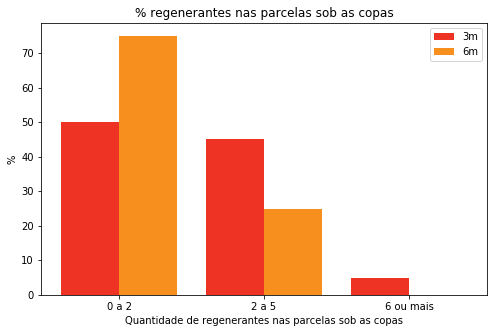

In [28]:
#https://www.dezyre.com/recipes/generate-grouped-bar-plot-in-python
legenda_eixo_x = ['0 a 2', '2 a 5', '6 ou mais']
legendas_tamanhos = ['3m', '6m']

# Setting the positions and width for the bars
pos = list(range(len(dados_copa3m)))
# Set the labels for the x ticks
bar_width = 0.4

fig, ax = plt.subplots(figsize=(8, 5))
ax.bar(pos, dados_copa3m ,  width=bar_width, color='#EE3224')
ax.bar([p + bar_width for p in pos], dados_copa6m,  width=bar_width, color='#F78F1E')
# Set the position of the x ticks
ax.set_xticks([p + 0.5 * bar_width for p in pos])
ax.set_xticklabels(legenda_eixo_x)

plt.title ("% regenerantes nas parcelas sob as copas")
plt.ylabel("%")
plt.xlabel("Quantidade de regenerantes nas parcelas sob as copas")
plt.legend(legendas_tamanhos)


In [29]:
#quantidade de individuos nas parcelas no entorno
entorno_with_nan = df_with_nan[df_with_nan['Área'] == 'Entorno']
abundancia_entorno = entorno_with_nan.groupby(['Palmeira','Quadrante'])['Número'].count() 

abundancia_entorno3m = entorno_with_nan[entorno_with_nan['Altura Palmeira (m)'] == '3']
abundancia_entorno6m = entorno_with_nan[entorno_with_nan['Altura Palmeira (m)'] == '6']

abundancia_entorno3m.describe()

,Altura (cm),Dap (mm)
count,135.000000,135.000000
mean,77.903704,9.394222
std,84.019798,10.859971
min,5.000000,1.450000
25%,33.500000,3.825000
50%,50.000000,6.100000
75%,80.500000,9.700000
max,600.000000,68.700000


In [30]:
abundancia_entorno6m.describe()

,Altura (cm),Dap (mm)
count,97.000000,97.000000
mean,85.731959,9.278557
std,121.763561,11.025570
min,20.000000,1.180000
25%,26.000000,3.500000
50%,47.000000,5.000000
75%,87.000000,9.950000
max,800.000000,67.130000


In [33]:
print("TESTES ESTATISTICOS DE NORMALIDADE PARA AS DISTRIBUIÇOES DE ALTURAS E DIAMETROS DAS PLANTAS NO ENTORNO DAS PALMEIRAS DE 3M E 6M")

#teste Shapiro: checagem de normalidade
#teste F: comparação de variâncias 
#teste Mann-Whithney: comparação de distribuicoes (https://operdata.com.br/blog/teste-t-e-mann-whitney-para-amostras-independentes)

#-------------------------------------------ALTURA ------------------------------------------------------------

print("---------------------------- ALTURA -----------------------------------")

# 1 - Shapiro-Wilk Test (teste de normalidade) para os dados de ALTURA do entorno 3M
stat, p = shapiro(abundancia_entorno3m['Altura (cm)'])
print('Statistics=%.3f, p=%.3f' % (stat, p))

alpha = 0.05
if p > alpha:
	print('Grupo ENTORNO 3M tem distribuição normal para altura (aceita H0)')
else:
	print('Grupo ENTORNO 3M não tem distribuição normal  para altura (rejeita H0)')

print('-------------------------------------------------------------------------')

# 2 - Shapiro-Wilk Test (teste de normalidade) para os dados de ALTURA NO ENTORNO 6M
stat, p = shapiro(abundancia_entorno6m['Altura (cm)'])
print('Statistics=%.3f, p=%.3f' % (stat, p))

if p > alpha:
	print('Grupo ENTORNO 6M tem distribuição normal para altura (aceita H0)')
else:
	print('Grupo ENTORNO 6M não tem distribuição normal  para altura (rejeita H0)')

print('-------------------------------------------------------------------------')
# 4 - Mann-Withney Test PARA DADOS DE ALTURA NO ENTORNO
stat, p = mannwhitneyu(abundancia_entorno3m['Altura (cm)'], abundancia_entorno6m['Altura (cm)'])

if p > alpha:
	print('MANN-WHITNEY:: A média das alturas não varia significativamente nos dados de altura no entorno (aceita H0)')
else:
	print('MANN-WHITNEY: A média das alturas varia significativamente nos dados de altura no entorno (rejeita H0)')

print('---------------------------------- DIAMETRO ---------------------------------------')

# 1 - Shapiro-Wilk Test (teste de normalidade) para os dados de DIAMETRO NO ENTORNO 3M
stat, p = shapiro(abundancia_entorno3m['Dap (mm)'])
print('Statistics=%.3f, p=%.3f' % (stat, p))

if p > alpha:
	print('Grupo ENTORNO 3M tem distribuição normal para diametro (aceita H0)')
else:
	print('Grupo ENTORNO 3M não tem distribuição normal para diametro (rejeita H0)')

print('-------------------------------------------------------------------------')

# 2 - Shapiro-Wilk Test (teste de normalidade) para os dados de DIAMETRO NO ENTORNO 6M
stat, p = shapiro(abundancia_entorno6m['Dap (mm)'])
print('Statistics=%.3f, p=%.3f' % (stat, p))

alpha = 0.05
if p > alpha:
	print('Grupo ENTORNO 6M tem distribuição normal para diametro (aceita H0)')
else:
	print('Grupo ENTORNO 6M não tem distribuição normal para diametro (rejeita H0)') 

print('-------------------------------------------------------------------------')

# 3 - Mann-Whithney Test PARA DADOS DE ALTURA NO ENTORNO
stat, p = mannwhitneyu(abundancia_entorno3m['Dap (mm)'], abundancia_entorno6m['Dap (mm)'])

if p > alpha:
	print('MANN-WHITNEY: A média dos diametros não varia significativamente nos dados de diametro no entorno (aceita H0)')
else:
	print('MANN-WHITNEY: A média dos diametros varia significativamente nos dados de altura de diametro no entorno (rejeita H0)')
    

TESTES ESTATISTICOS DE NORMALIDADE PARA AS DISTRIBUIÇOES DE ALTURAS E DIAMETROS DAS PLANTAS NO ENTORNO DAS PALMEIRAS DE 3M E 6M
---------------------------- ALTURA -----------------------------------
Statistics=0.634, p=0.000
Grupo ENTORNO 3M não tem distribuição normal  para altura (rejeita H0)
-------------------------------------------------------------------------
Statistics=nan, p=1.000
Grupo ENTORNO 6M tem distribuição normal para altura (aceita H0)
-------------------------------------------------------------------------
MANN-WHITNEY:: A média das alturas não varia significativamente nos dados de altura no entorno (aceita H0)
---------------------------------- DIAMETRO ---------------------------------------
Statistics=0.607, p=0.000
Grupo ENTORNO 3M não tem distribuição normal para diametro (rejeita H0)
-------------------------------------------------------------------------
Statistics=nan, p=1.000
Grupo ENTORNO 6M tem distribuição normal para diametro (aceita H0)
------------

In [32]:
abundancia_entorno

Palmeira  Quadrante
1         1             3
          2            10
          3             6
          4             3
10        1             3
          2             5
          3             3
          4             3
2         1             3
          2             4
          3             4
          4             4
3         1             9
          2             3
          3             4
          4             6
4         1             7
          2             8
          3             9
          4            13
5         1             6
          2            13
          3            14
          4             6
6         1             5
          2             6
          3             4
          4             5
7         1            10
          2             3
          3             7
          4             6
8         1             3
          2             9
          3             7
          4             3
9         1             3
          2       

In [33]:
#Percentual de invidiviudos nas parcelas do entorno
total_parcelas_entorno = abundancia_entorno.count()
entorno_0_2 = (abundancia_entorno[abundancia_entorno < 3 ].count() / total_parcelas_entorno) * 100
entorno_3_5 = (abundancia_entorno[abundancia_entorno[(abundancia_entorno >= 3) & (abundancia_entorno <6)]].count() / total_parcelas_entorno) * 100
entorno_6_14 =(abundancia_entorno[abundancia_entorno[(abundancia_entorno >= 6) ]].count() / total_parcelas_entorno) * 100
dados_entorno = [entorno_0_2,entorno_3_5,entorno_6_14]

Text(0.5,0,'Quantidade de regenerantes nas parcelas do entorno')

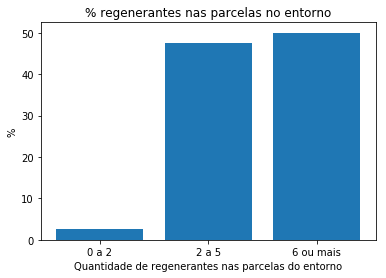

In [34]:
legendas = ['0 a 2', '2 a 5', '6 ou mais']
dados = dados_entorno

ax = plt.figure().gca()
ax.bar(legendas,dados)
plt.title ("% regenerantes nas parcelas no entorno")
plt.ylabel("%")
plt.xlabel("Quantidade de regenerantes nas parcelas do entorno")


In [35]:
abundancia_entorno3m = abundancia_entorno3m.groupby(['Palmeira','Quadrante'])['Número'].count()
abundancia_entorno6m = abundancia_entorno6m.groupby(['Palmeira','Quadrante'])['Número'].count() 
abundancia_entorno3m

Palmeira  Quadrante
1         1             3
          2            10
          3             6
          4             3
2         1             3
          2             4
          3             4
          4             4
3         1             9
          2             3
          3             4
          4             6
4         1             7
          2             8
          3             9
          4            13
5         1             6
          2            13
          3            14
          4             6
Name: Número, dtype: int64

In [36]:
#Percentual de individuos no entorno de palmeiras 3m
total_parcelas_entorno3m = abundancia_entorno3m.count()
entorno3m_0_2 = (abundancia_entorno3m[abundancia_entorno3m < 3 ].count() / total_parcelas_entorno3m) * 100
entorno3m_3_5 = (abundancia_entorno3m[abundancia_entorno3m[(abundancia_entorno3m >= 3) & (abundancia_entorno3m <6)]].count()/ total_parcelas_entorno3m) * 100
entorno3m_6_8 = (abundancia_entorno3m[abundancia_entorno3m[(abundancia_entorno3m >= 6) ]].count() / total_parcelas_entorno3m) * 100
dados_entorno3m = [entorno3m_0_2, entorno3m_3_5, entorno3m_6_8]

#Percentual de individuos no entorno de palmeiras 6m
total_parcelas_entorno6m = abundancia_entorno6m.count()
entorno6m_0_2 = (abundancia_entorno6m[abundancia_entorno6m < 3 ].count() / total_parcelas_entorno6m) * 100
entorno6m_3_5 = (abundancia_entorno6m[abundancia_entorno6m[(abundancia_entorno6m >= 3) & (abundancia_entorno6m <6)]].count()/ total_parcelas_entorno6m) * 100
entorno6m_6_14 = (abundancia_entorno6m[abundancia_entorno6m[(abundancia_entorno6m >= 6) ]].count() / total_parcelas_entorno6m) * 100
dados_entorno6m = [entorno6m_0_2, entorno6m_3_5, entorno6m_6_14]

dados_entorno3m

[0.0, 40.0, 60.0]

In [37]:
dados_entorno6m

[5.0, 55.00000000000001, 40.0]

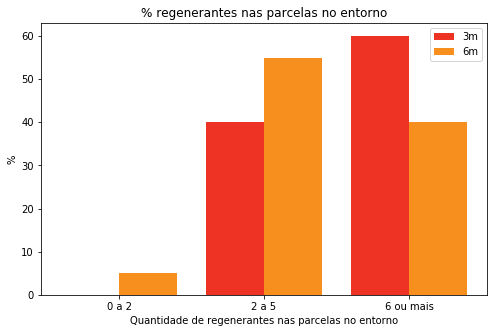

In [38]:
legenda_eixo_x = ['0 a 2', '2 a 5', '6 ou mais']
legendas_tamanhos = ['3m', '6m']

# Setting the positions and width for the bars
pos = list(range(len(dados_entorno3m)))
# Set the labels for the x ticks
bar_width = 0.4

fig, ax = plt.subplots(figsize=(8, 5))
ax.bar(pos, dados_entorno3m ,  width=bar_width, color='#EE3224')
ax.bar([p + bar_width for p in pos], dados_entorno6m,  width=bar_width, color='#F78F1E')
# Set the position of the x ticks
ax.set_xticks([p + 0.5 * bar_width for p in pos])
ax.set_xticklabels(legenda_eixo_x)

plt.title ("% regenerantes nas parcelas no entorno")
plt.ylabel("%")
plt.xlabel("Quantidade de regenerantes nas parcelas no entorno")
plt.legend(legendas_tamanhos)


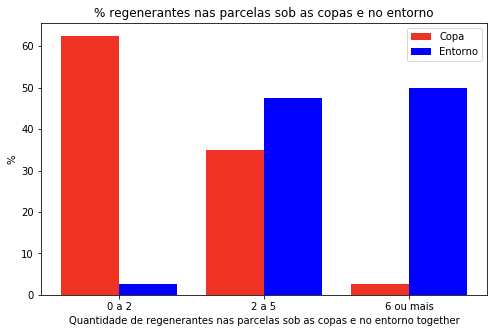

In [39]:
#Grafico de barras considerando todos os dados
legenda_eixo_x = ['0 a 2', '2 a 5', '6 ou mais']
legendas_tamanhos = ['Copa', 'Entorno']

# Setting the positions and width for the bars
pos = list(range(len(dados_copa)))
# Set the labels for the x ticks
bar_width = 0.4

fig, ax = plt.subplots(figsize=(8, 5))
ax.bar(pos, dados_copa ,  width=bar_width, color='#EE3224')
ax.bar([p + bar_width for p in pos], dados_entorno,  width=bar_width, color='blue')
# Set the position of the x ticks
ax.set_xticks([p + 0.5 * bar_width for p in pos])
ax.set_xticklabels(legenda_eixo_x)

plt.title ("% regenerantes nas parcelas sob as copas e no entorno")
plt.ylabel("%")
plt.xlabel("Quantidade de regenerantes nas parcelas sob as copas e no entorno together")
plt.legend(legendas_tamanhos)

In [40]:
#TESTES ESTATISTICOS DOS DADOS DE ABUNDANCIA DAS PALMEIRAS 
#1, TODAS
#2. APENAS COPAs
#3. APENAS ENTORNO

print("1. ABUNDANCIA TODAS AS PALMEIRAS --------------------------------------")
# 1 - Shapiro-Wilk Test (teste de normalidade) para os dados da copa
stat, p = shapiro(abundancia_copa)
print('Statistics=%.3f, p=%.3f' % (stat, p))

alpha = 0.05
if p > alpha:
	print('Grupo COPA tem distribuição normal (aceita H0)')
else:
	print('Grupo COPA não tem distribuição normal (rejeita H0)')
    
 # 2 - Shapiro-Wilk Test (teste de normalidade) para os dados do entorno
stat, p = shapiro(abundancia_entorno)
print('Statistics=%.3f, p=%.3f' % (stat, p))

alpha = 0.05
if p > alpha:
    print('Grupo ENTORNO tem distribuição normal (aceita H0)')
else:
    print('Grupo ENTORNO não tem distribuição normal (rejeita H0)')

    # 3 - Mann-Whitney test (dados com distribuicao nao normal)
stat, p = mannwhitneyu(abundancia_copa, abundancia_entorno)
print('Statistics=%.3f, p=%.3f' % (stat, p))

alpha = 0.05

if p > alpha:
	print('Mesma distribuição (aceita H0)')
else:
	print('Diferentes distribuiçoes (rejeita H0), ou seja, existem diferenças significativas entre as duas condicoes')
    

1. ABUNDANCIA TODAS AS PALMEIRAS --------------------------------------
Statistics=0.909, p=0.003
Grupo COPA não tem distribuição normal (rejeita H0)
Statistics=0.900, p=0.002
Grupo ENTORNO não tem distribuição normal (rejeita H0)
Statistics=224.500, p=0.000
Diferentes distribuiçoes (rejeita H0), ou seja, existem diferenças significativas entre as duas condicoes


In [41]:
#TESTES ESTATISTICOS DOS DADOS DE ABUNDANCIA DAS PALMEIRAS DA COPA

print("2. ABUNDANCIA APENAS NA COPA 3M E 6M--------------------------------------")
# 1 - Shapiro-Wilk Test (teste de normalidade) para os dados da copa 3M
stat, p = shapiro(abundancia_copa3m)
print('Statistics=%.3f, p=%.3f' % (stat, p))

alpha = 0.05
if p > alpha:
	print('Grupo COPA 3M tem distribuição normal (aceita H0)')
else:
	print('Grupo COPA 3M não tem distribuição normal (rejeita H0)')
    
 # 2 - Shapiro-Wilk Test (teste de normalidade) para os dados do copa 6M
stat, p = shapiro(abundancia_copa6m)
print('Statistics=%.3f, p=%.3f' % (stat, p))

alpha = 0.05
if p > alpha:
    print('Grupo  COPA 6M tem distribuição normal (aceita H0)')
else:
    print('Grupo COPA 6M  não tem distribuição normal (rejeita H0)')

    # 3 - Mann-Whitney test (dados com distribuicao nao normal)
stat, p = mannwhitneyu(abundancia_copa3m, abundancia_copa6m)
print('Statistics=%.3f, p=%.3f' % (stat, p))

alpha = 0.05

if p > alpha:
	print('Man Withney Test: Mesma distribuição (aceita H0)')
else:
	print('Man Withney Test: Diferentes distribuiçoes (rejeita H0), ou seja, existem diferenças significativas entre as duas condicoes')

# 4 - Welch’s T-TEST para dados de diametro
stat, p = stats.ttest_ind(abundancia_copa3m,abundancia_copa6m, equal_var= False )

if p > alpha:
	print('Welch’s T-TEST: A média da abundancia não varia significativamente nos dados das copas (aceita H0)')
else:
	print('Welch’s T-TEST: A média da abundancia varia significativamente nos dados das copas (rejeita H0)')

2. ABUNDANCIA APENAS NA COPA 3M E 6M--------------------------------------
Statistics=0.931, p=0.164
Grupo COPA 3M tem distribuição normal (aceita H0)
Statistics=0.911, p=0.065
Grupo  COPA 6M tem distribuição normal (aceita H0)
Statistics=155.500, p=0.111
Man Withney Test: Mesma distribuição (aceita H0)
Welch’s T-TEST: A média da abundancia não varia significativamente nos dados das copas (aceita H0)


In [42]:
#TESTES ESTATISTICOS DOS DADOS DE ABUNDANCIA DAS PALMEIRAS DO ENTORNO

print("3. ABUNDANCIA APENAS NO ENTORNO 3M E 6M--------------------------------------")
# 1 - Shapiro-Wilk Test (teste de normalidade) para os dados da ENTORNO 3M
stat, p = shapiro(abundancia_entorno3m)
print('Statistics=%.3f, p=%.3f' % (stat, p))

alpha = 0.05
if p > alpha:
	print('Grupo ENTORNO 3M tem distribuição normal (aceita H0)')
else:
	print('Grupo ENTORNO 3M não tem distribuição normal (rejeita H0)')
    
 # 2 - Shapiro-Wilk Test (teste de normalidade) para os dados do ENTORNO 6M
stat, p = shapiro(abundancia_entorno6m)
print('Statistics=%.3f, p=%.3f' % (stat, p))

alpha = 0.05
if p > alpha:
    print('Grupo  ENTORNO 6M tem distribuição normal (aceita H0)')
else:
    print('Grupo ENTORNO 6M  não tem distribuição normal (rejeita H0)')

    # 3 - Mann-Whitney test (dados com distribuicao nao normal)
stat, p = mannwhitneyu(abundancia_entorno3m, abundancia_entorno6m)
print('Statistics=%.3f, p=%.3f' % (stat, p))

alpha = 0.05

if p > alpha:
	print('Man Withney Test: Mesma distribuição (aceita H0)')
else:
	print('Man Withney Test: Diferentes distribuiçoes (rejeita H0), ou seja, existem diferenças significativas entre as duas condicoes')


3. ABUNDANCIA APENAS NO ENTORNO 3M E 6M--------------------------------------
Statistics=0.878, p=0.016
Grupo ENTORNO 3M não tem distribuição normal (rejeita H0)
Statistics=0.936, p=0.203
Grupo  ENTORNO 6M tem distribuição normal (aceita H0)
Statistics=140.500, p=0.052
Man Withney Test: Mesma distribuição (aceita H0)


In [43]:
#Dataframe sem quadrantes e numeros nulos (df_without_nan)
df_without_nan = df.copy()
df_without_nan.dropna(subset=[ 'Número'], inplace=True)
df_without_nan['Área'].value_counts()

Entorno    232
Copa        95
Name: Área, dtype: int64

In [44]:
#contar registros em cada coluna - área da copa
df_without_nan[df_without_nan['Área'] == 'Copa'].count()

Data                   95
Palmeira               95
Altura Palmeira (m)    95
Área                   95
Quadrante              95
Número                 95
Família                95
Gênero                 95
Espécie                95
Altura (cm)            95
Dap (mm)               95
Coletada               95
Nativa                 95
Estágio sucessional    95
Obs                     4
Identificação          55
dtype: int64

In [45]:
#contar registros em cada coluna - área do entorno
df_without_nan[df_without_nan['Área'] == 'Entorno'].count()

Data                   232
Palmeira               232
Altura Palmeira (m)    232
Área                   232
Quadrante              232
Número                 232
Família                232
Gênero                 232
Espécie                232
Altura (cm)            232
Dap (mm)               232
Coletada               232
Nativa                 232
Estágio sucessional    232
Obs                     36
Identificação          146
dtype: int64

Text(0,0.5,'Número de indivíduos')

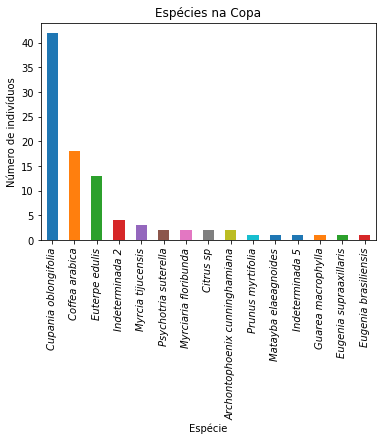

In [46]:
#Gráfico de barras da area das especies da area da copa ordenadas de forma descendente
plot_copa = df_without_nan[df_without_nan['Área'] == 'Copa']
plot_copa =  plot_copa[~plot_copa['Espécie'].isin(['Pendente'] )]
plot_copa = plot_copa.groupby('Espécie')['Número'].count() 
plot_copa = plot_copa[plot_copa > 0]
plot_copa = plot_copa.sort_values(ascending = False)

ax = plt.figure().gca()
ax = plot_copa.plot.bar()
ax.yaxis.set_major_locator(MaxNLocator(integer=True))
plt.xticks(fontstyle='italic')
plt.title ("Espécies na Copa")
plt.ylabel("Número de indivíduos")

Text(0,0.5,'Número de indivíduos')

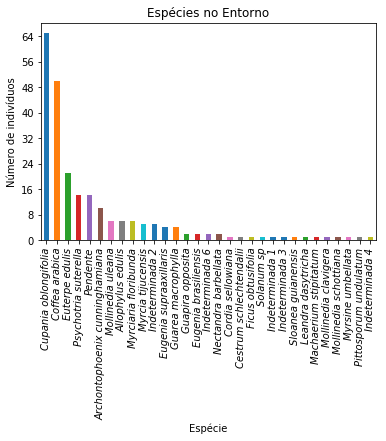

In [47]:
#Gráfico de barras da area das especies da area do entorno ordenadas de forma descendente
plot_entorno = df_without_nan[['Área','Espécie','Número']]
plot_entorno= plot_entorno[plot_entorno['Área'] == 'Entorno']
plot_entorno = plot_entorno.groupby('Espécie')['Número'].count()
plot_entorno = plot_entorno[ plot_entorno > 0 ]
plot_entorno = plot_entorno.sort_values(ascending = False)

ax = plt.figure().gca()
ax = plot_entorno.plot.bar()
ax.yaxis.set_major_locator(MaxNLocator(integer=True))
plt.xticks(fontstyle='italic')
plt.title ("Espécies no Entorno")
plt.ylabel("Número de indivíduos")

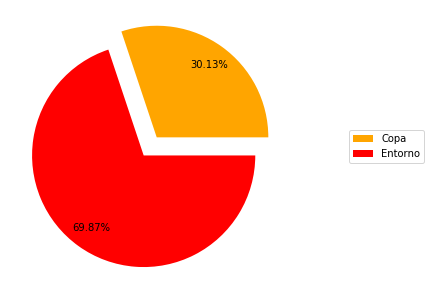

In [48]:
#Percentual de indivíduos arbóreos regenerantes sob a copa de palmeiras Livistona chinensis de 3 m de altura e no entorno delas.

regenerantes_por_area = df_without_nan[~df_without_nan['Espécie'].isin(['Pendente'] )]
regenerantes_por_area = regenerantes_por_area.groupby('Área', as_index=False)['Número'].count() 
regenerantes_por_area = regenerantes_por_area[regenerantes_por_area > 0]
regenerantes_por_area = regenerantes_por_area.dropna()

labels = regenerantes_por_area['Área'].tolist()

sizes =  regenerantes_por_area['Número'].tolist()

explode = [0.1, 0.1]

colors = ['#FFA500', '#FF0000']

fig, ax = plt.subplots(figsize=(5, 5))
ax.axis('equal')

pie = ax.pie(sizes, explode=explode, colors=colors,
             autopct='%1.2f%%', pctdistance =0.80,textprops=dict(color="black"))

plt.legend(pie[0], labels, bbox_to_anchor=(1.5,0.5), loc="right")

plt.show()

/home/tania/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


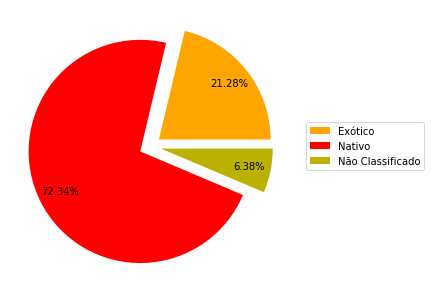

In [49]:
#Proporção de indivíduos arbóreos regenerantes nativos e exóticos sob as copas de palmeiras Livistona chinensis de 3 m de altura e no entorno delas.
regenerantes_por_origem = df_without_nan[df_without_nan['Área'] == 'Copa']
regenerantes_por_origem = regenerantes_por_origem[~df['Espécie'].isin(['Pendente'] )]
regenerantes_por_origem = regenerantes_por_origem.groupby('Nativa', as_index=False)['Número'].count() 
regenerantes_por_origem = regenerantes_por_origem[regenerantes_por_origem > 0]
regenerantes_por_origem = regenerantes_por_origem.dropna()

labels = ['Exótico', 'Nativo', 'Não Classificado']

sizes =  regenerantes_por_origem['Número'].tolist()

explode = [0.1, 0.1, 0.1]

colors = ['#FFA500', '#FF0000', '#BBB100']

fig, ax = plt.subplots(figsize=(5, 5))
ax.axis('equal')

pie = ax.pie(sizes, explode=explode, colors=colors,
             autopct='%1.2f%%', pctdistance =0.80,textprops=dict(color="black"))

plt.legend(pie[0], labels, bbox_to_anchor=(1.5,0.5), loc="right")

plt.show()

/home/tania/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


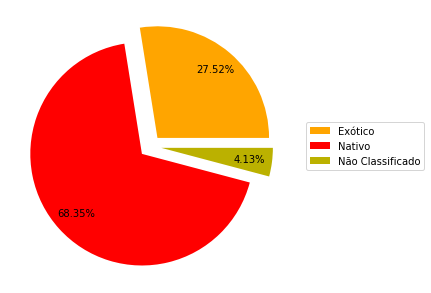

In [50]:
#Proporção de indivíduos arbóreos regenerantes nativos e exóticos no entorno palmeiras Livistona chinensis de 3 m de altura e no entorno delas.
regenerantes_por_origem = df_without_nan[df_without_nan['Área'] == 'Entorno']
regenerantes_por_origem = regenerantes_por_origem[~df['Espécie'].isin(['Pendente'] )]
regenerantes_por_origem = regenerantes_por_origem.groupby('Nativa', as_index=False)['Número'].count() 
regenerantes_por_origem = regenerantes_por_origem[regenerantes_por_origem > 0]
regenerantes_por_origem = regenerantes_por_origem.dropna()

labels = ['Exótico', 'Nativo', 'Não Classificado']

sizes =  regenerantes_por_origem['Número'].tolist()

explode = [0.1, 0.1, 0.1]

colors = ['#FFA500', '#FF0000', '#BBB100']

fig, ax = plt.subplots(figsize=(5, 5))
ax.axis('equal')

pie = ax.pie(sizes, explode=explode, colors=colors,
             autopct='%1.2f%%', pctdistance =0.80,textprops=dict(color="black"))

plt.legend(pie[0], labels, bbox_to_anchor=(1.5,0.5), loc="right")

plt.show()

/home/tania/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


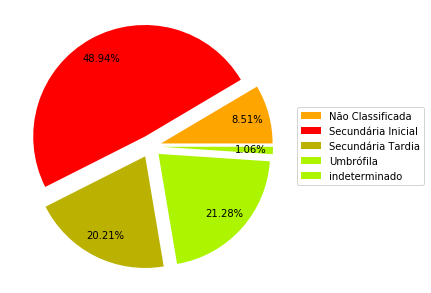

In [51]:
 #Proporção de indivíduos arbóreos regenerantes na COPA por ESTAGIO SUCESSIONAL
regenerantes_por_estagio = df_without_nan[df_without_nan['Área'] == 'Copa']
regenerantes_por_estagio = regenerantes_por_estagio[~df['Espécie'].isin(['Pendente'] )]
regenerantes_por_estagio = regenerantes_por_estagio.groupby('Estágio sucessional', as_index=False)['Número'].count() 
regenerantes_por_estagio = regenerantes_por_estagio[regenerantes_por_estagio > 0]
regenerantes_por_estagio = regenerantes_por_estagio.dropna()

labels = regenerantes_por_estagio['Estágio sucessional'].tolist()

sizes =  regenerantes_por_estagio['Número'].tolist()

explode = [0.1, 0.1, 0.1, 0.1, 0.1]

colors = ['#FFA500', '#FF0000', '#BBB100',  '#ACF400',  '#ACF400']

fig, ax = plt.subplots(figsize=(5, 5))
ax.axis('equal')

pie = ax.pie(sizes, explode=explode, colors=colors,
             autopct='%1.2f%%', pctdistance =0.80,textprops=dict(color="black"))

plt.legend(pie[0], labels, bbox_to_anchor=(1.5,0.5), loc="right")

plt.show()

In [52]:
labels

['Não Classificada',
 'Secundária Inicial',
 'Secundária Tardia',
 'Umbrófila',
 'indeterminado']

/home/tania/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


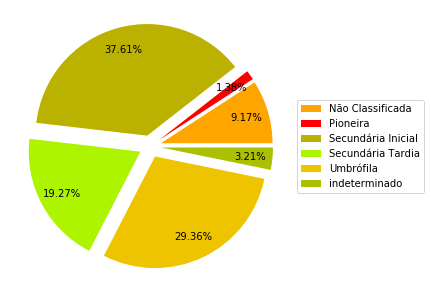

In [53]:
 #Proporção de indivíduos arbóreos regenerantes Pioneiros e Não Pioneiros no entorno de palmeiras Livistona chinensis de 3 m de altura e no entorno delas.
regenerantes_por_estagio = df_without_nan[df_without_nan['Área'] == 'Entorno']
regenerantes_por_estagio = regenerantes_por_estagio[~df['Espécie'].isin(['Pendente'] )]
regenerantes_por_estagio = regenerantes_por_estagio.groupby('Estágio sucessional', as_index=False)['Número'].count() 
regenerantes_por_estagio = regenerantes_por_estagio[regenerantes_por_estagio > 0]
regenerantes_por_estagio = regenerantes_por_estagio.dropna()

labels = regenerantes_por_estagio['Estágio sucessional'].tolist()

sizes =  regenerantes_por_estagio['Número'].tolist()

explode = [0.1, 0.1, 0.1, 0.1, 0.1, 0.1]

colors = ['#FFA500', '#FF0000', '#BBB100',  '#ACF400', '#EEC400', '#ABC000' ]

fig, ax = plt.subplots(figsize=(5, 5))
ax.axis('equal')

pie = ax.pie(sizes, explode=explode, colors=colors,
             autopct='%1.2f%%', pctdistance =0.80,textprops=dict(color="black"))

plt.legend(pie[0], labels, bbox_to_anchor=(1.5,0.5), loc="right")

plt.show()

In [54]:
labels

['Não Classificada',
 'Pioneira',
 'Secundária Inicial',
 'Secundária Tardia',
 'Umbrófila',
 'indeterminado']

In [55]:
#Distribuição das espécies  regenerantes

#especies copa
all_copa = df_without_nan[df_without_nan['Área'] == 'Copa']
all_copa = all_copa[~all_copa['Espécie'].isin(['Pendente'] )]
all_copa = all_copa['Espécie']
all_copa = all_copa.drop_duplicates()

#especies entorno
all_entorno = df_without_nan[df_without_nan['Área'] == 'Entorno']
all_entorno = all_entorno[~all_entorno['Espécie'].isin(['Pendente'] )]
all_entorno = all_entorno['Espécie']
all_entorno = all_entorno.drop_duplicates()

#especies comuns nos dois grupos                     
comum_copa_entorno = all_copa[all_copa.isin(all_entorno)]

#especies exclusivas de determinada area
only_copa =  all_copa[~all_copa.isin(comum_copa_entorno)]
only_entorno =  all_entorno[~all_entorno.isin(comum_copa_entorno)]


In [56]:
#apenas copa

only_copa

58        Prunus myrtifolia
94     Matayba elaeagnoides
103               Citrus sp
152         Indeterminada 5
Name: Espécie, dtype: object

In [57]:
#apenas entorno
only_entorno

12       Mollinedia schottiana
51            Guapira opposita
68           Mollinedia uleana
69       Pittosporum undulatum
70        Mollinedia clavigera
75       Machaerium stipitatum
77             Indeterminada 1
78     Cestrum schlechtendalii
109          Allophylus edulis
110         Leandra dasytricha
120          Myrsine umbellata
122       Nectandra barbellata
125          Cordia sellowiana
129            Indeterminada 6
174            Indeterminada 4
182            Indeterminada 3
205                 Solanum sp
209          Ficus obtusifolia
213         Sloanea guianensis
Name: Espécie, dtype: object

In [58]:
#especies em comum
comum_copa_entorno

1                      Coffea arabica
3                Cupania oblongifolia
8                Myrciaria floribunda
36                     Euterpe edulis
91                  Myrcia tijucensis
141                   Indeterminada 2
142              Psychotria suterella
148            Eugenia supraaxillaris
196                Guarea macrophylla
223    Archontophoenix cunninghamiana
260              Eugenia brasiliensis
Name: Espécie, dtype: object

In [59]:
#merge
only_copa_qtd = pd.DataFrame({'Área': ['Copa'],
                        'Quantidade': [only_copa.count()] })

only_entorno_qtd = pd.DataFrame({'Área': ['Entorno'],
                        'Quantidade': [only_entorno.count()] })

comum_copa_entorno_qtd = pd.DataFrame({'Área': ['Ambos'],
                        'Quantidade': [comum_copa_entorno.count()] })

merge = [only_copa_qtd,only_entorno_qtd, comum_copa_entorno_qtd]
resultado_merge = pd.concat(merge)

resultado_merge

,Área,Quantidade
0,Copa,4
0,Entorno,19
0,Ambos,11


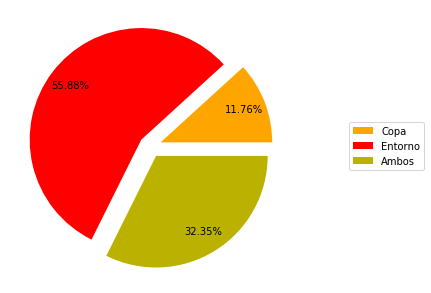

In [60]:
#grafico

labels = resultado_merge['Área'].tolist()

sizes =  resultado_merge['Quantidade'].tolist()

explode = [0.1, 0.1, 0.1]

colors = ['#FFA500', '#FF0000', '#BBB100']

fig, ax = plt.subplots(figsize=(5, 5))
ax.axis('equal')

pie = ax.pie(sizes, explode=explode, colors=colors,
             autopct='%1.2f%%', pctdistance =0.80,textprops=dict(color="black"))

plt.legend(pie[0], labels, bbox_to_anchor=(1.5,0.5), loc="right")

plt.show()

In [61]:
#Proporcao de individuos regenerantes na copa e no entorno 

#copa
copa_total = df_without_nan[df_without_nan['Área'] == 'Copa']
copa_total = copa_total[~copa_total['Espécie'].isin(['Pendente'] )]
copa_total = copa_total[['Espécie','Número', 'Área']]

copa_total_consolidada = pd.DataFrame({'Área': ['Copa'],
                        'Quantidade': [copa_total['Número'].count()] })

#entorno
entorno_total = df[df['Área'] == 'Entorno']
entorno_total = entorno_total[~entorno_total['Espécie'].isin(['Pendente'] )]
entorno_total = entorno_total[['Espécie','Número', 'Área']]

entorno_total_consolidado = pd.DataFrame({'Área': ['Entorno'],
                        'Quantidade': [entorno_total['Número'].count()] })

merge = [copa_total_consolidada, entorno_total_consolidado]
resultado_merge = pd.concat(merge)

resultado_merge


,Área,Quantidade
0,Copa,94
0,Entorno,218


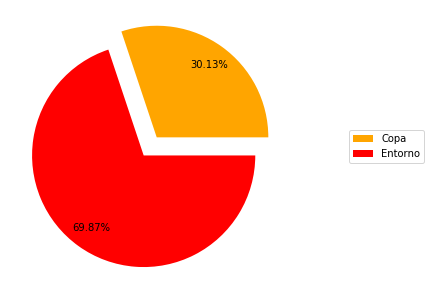

In [62]:
#Grafico

labels = resultado_merge['Área'].tolist()

sizes =  resultado_merge['Quantidade'].tolist()

explode = [0.1, 0.1]

colors = ['#FFA500', '#FF0000']

fig, ax = plt.subplots(figsize=(5, 5))
ax.axis('equal')

pie = ax.pie(sizes, explode=explode, colors=colors,
             autopct='%1.2f%%', pctdistance =0.80,textprops=dict(color="black"))

plt.legend(pie[0], labels, bbox_to_anchor=(1.5,0.5), loc="right")

plt.show()

In [63]:
#TESTES ESTATISTICOS
#Para as distribuicoes de altura e diametro das especies C.oblongifolia, C. arabica e E. edulis nas copas e no entorno

In [64]:
selected_species = df_without_nan[(df_without_nan['Espécie'] == 'Cupania oblongifolia') | 
                            (df_without_nan['Espécie'] == 'Coffea arabica') | 
                            (df_without_nan['Espécie'] == 'Euterpe edulis') ]

selected_species_copa = selected_species[selected_species['Área'] == 'Copa']

selected_species_entorno = selected_species[selected_species['Área'] == 'Entorno']

In [65]:
# 1 - Shapiro-Wilk Test (teste de normalidade) para os dados de ALTURA dos regenerantes sob COPAS
stat, p = shapiro(selected_species_copa['Altura (cm)'])
print('Statistics=%.3f, p=%.3f' % (stat, p))

# resultado
alpha = 0.05
if p > alpha:
    print('Grupo COPA tem distribuição normal  para dados de ALTURA (aceita H0)')
else:
    print('Grupo COPA não tem distribuição normal  para dados de ALTURA (rejeita H0)')

Statistics=0.586, p=0.000
Grupo COPA não tem distribuição normal  para dados de ALTURA (rejeita H0)


In [66]:
# 1 - Shapiro-Wilk Test (teste de normalidade) para os dados de ALTURA dos regenerantes no ENTORNO
stat, p = shapiro(selected_species_entorno['Altura (cm)'])
print('Statistics=%.3f, p=%.3f' % (stat, p))

# resultado
alpha = 0.05
if p > alpha:
    print('Grupo ENTORNO tem distribuição normal  para dados de ALTURA (aceita H0)')
else:
    print('Grupo ENTORNO não tem distribuição normal para dados de ALTURA (rejeita H0)')

Statistics=0.674, p=0.000
Grupo ENTORNO não tem distribuição normal para dados de ALTURA (rejeita H0)


In [67]:
#Teste Man-Whitney para Altura
stat, p = mannwhitneyu(selected_species_entorno['Altura (cm)'], selected_species_copa['Altura (cm)'])
print('Statistics=%.3f, p=%.3f' % (stat, p))

#  resultado

alpha = 0.05

if p > alpha:
	print('Mesma distribuição para ALTURA(aceita H0)')
else:
	print('Diferentes distribuiçoes para ALTURA(rejeita H0), ou seja, existem diferenças significativas entre as duas condicoes')

Statistics=4554.500, p=0.163
Mesma distribuição para ALTURA(aceita H0)


In [68]:
# 1 - Shapiro-Wilk Test (teste de normalidade) para os dados de DAP dos regenerantes sob COPAS
stat, p = shapiro(selected_species_copa['Dap (mm)'])
print('Statistics=%.3f, p=%.3f' % (stat, p))

# resultado
alpha = 0.05
if p > alpha:
    print('Grupo COPA tem distribuição normal  para dados de DAP (aceita H0)')
else:
    print('Grupo COPA não tem distribuição normal para dados de DAP(rejeita H0)')

Statistics=0.666, p=0.000
Grupo COPA não tem distribuição normal para dados de DAP(rejeita H0)


In [69]:
# 1 - Shapiro-Wilk Test (teste de normalidade) para os dados de DAP dos regenerantes no ENTORNO
stat, p = shapiro(selected_species_entorno['Dap (mm)'])
print('Statistics=%.3f, p=%.3f' % (stat, p))

# resultado
alpha = 0.05
if p > alpha:
    print('Grupo ENTORNO tem distribuição normal  para dados de DAP (aceita H0)')
else:
    print('Grupo ENTORNO não tem distribuição normal para dados de DAP(rejeita H0)')

Statistics=0.598, p=0.000
Grupo ENTORNO não tem distribuição normal para dados de DAP(rejeita H0)


In [70]:
#Teste Man-Whitney para DAP
stat, p = mannwhitneyu(selected_species_entorno['Dap (mm)'], selected_species_copa['Dap (mm)'])
print('Statistics=%.3f, p=%.3f' % (stat, p))

#  resultado

alpha = 0.05

if p > alpha:
	print('Mesma distribuição para DAP(aceita H0)')
else:
	print('Diferentes distribuiçoes para DAP (rejeita H0), ou seja, existem diferenças significativas entre as duas condicoes')

Statistics=4842.500, p=0.386
Mesma distribuição para DAP(aceita H0)
